# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-Svpk0lXb-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 72636.06 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 100896.90 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 121006.13 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 128083.27 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 135928.75 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 78473.99 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 111525.12 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 131192.77 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 142731.92 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 148372.13 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 152720.23 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.81 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.85 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.83 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.81 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 45.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.73 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.26 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.66 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.56 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.06 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.21 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.98 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.41 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.88 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.62 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.74 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.83 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.96 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.56 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:11, 15.26 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.44 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 34.73 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.44 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.19 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 46.66 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 46.16 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.38 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.42 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.30 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.63 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:10, 15.40 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.40 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 33.41 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 38.63 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 42.37 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 44.55 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 44.17 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.76 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.28 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.70 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.95 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.50 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 21.71 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:02<00:06, 10.85 examples/s]

Map:  64%|██████▍   | 64/100 [00:04<00:02, 13.91 examples/s]

Map:  96%|█████████▌| 96/100 [00:06<00:00, 16.35 examples/s]

Map: 100%|██████████| 100/100 [00:06<00:00, 16.16 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.53 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 27.27 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.83 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.89 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 42.10 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.13 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.66 examples/s]

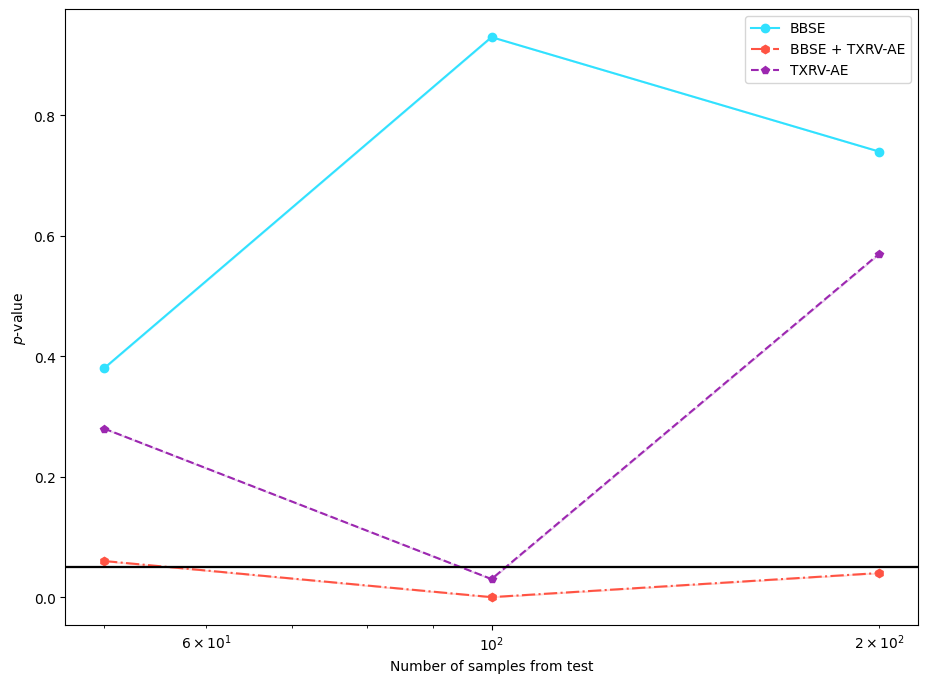

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:12, 13.64 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 23.96 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 31.89 examples/s]

Map:  64%|██████▍   | 128/200 [00:04<00:01, 38.98 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.91 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 49.17 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 48.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.33 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.15 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:02<00:04, 14.98 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 26.86 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 33.11 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.03 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.38 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.05 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.43 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 48.32 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 47.90 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.34 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.57 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.19 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.84 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 47.40 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 46.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.81 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.27 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 26.09 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 34.05 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:11, 14.56 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 25.93 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.12 examples/s]

Map:  64%|██████▍   | 128/200 [00:04<00:01, 38.23 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.40 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 43.32 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 42.49 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.27 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.86 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.57 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.07 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.53 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.42 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.14 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.38 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.93 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.91 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.58 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.54 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.78 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.21 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.85 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.54 examples/s]

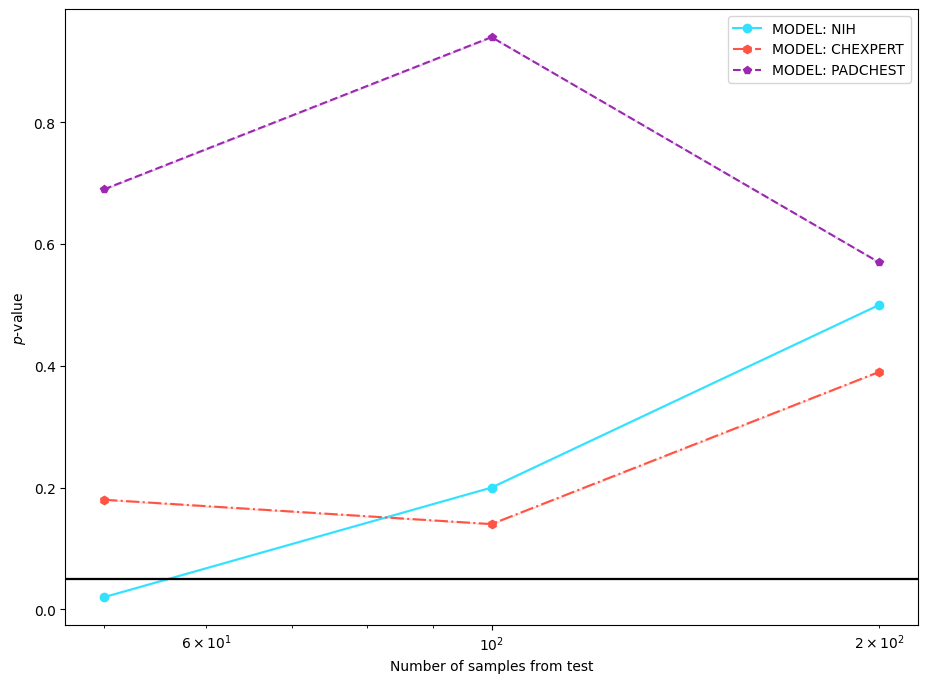

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 58773.57 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 83164.41 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 95433.23 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 102268.89 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 106266.34 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 109274.77 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53688.23 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74235.54 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91146.63 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 97549.41 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 100223.52 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 104576.48 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:11, 15.05 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.73 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.10 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.32 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.41 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.80 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.96 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.65 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.06 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.99 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.26 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.83 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.73 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.33 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.88 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.40 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.73 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.24 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53860.26 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71583.01 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 85701.16 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 95858.21 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 103282.28 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108358.31 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  16%|█▌        | 18000/112120 [00:00<00:01, 47537.91 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 77691.19 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 92176.10 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 100308.89 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 108093.96 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 111770.61 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:13, 12.83 examples/s]

Map:  32%|███▏      | 64/200 [00:03<00:05, 24.13 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 33.43 examples/s]

Map:  64%|██████▍   | 128/200 [00:04<00:01, 40.95 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.18 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 51.43 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 51.14 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:03<00:01,  9.40 examples/s]

Map: 100%|██████████| 50/50 [00:03<00:00, 14.25 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:03<00:07,  9.54 examples/s]

Map:  64%|██████▍   | 64/100 [00:04<00:02, 16.78 examples/s]

Map:  96%|█████████▌| 96/100 [00:05<00:00, 22.24 examples/s]

Map: 100%|██████████| 100/100 [00:05<00:00, 22.33 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.43 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.61 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.49 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.95 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.75 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.46 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.02 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53518.60 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 78511.48 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 91778.72 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96578.50 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 102017.09 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 105048.03 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  11%|█         | 12000/112120 [00:00<00:03, 32200.32 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 76196.11 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83940.32 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96647.93 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 103154.18 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 107577.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:02<00:12, 13.60 examples/s]

Map:  32%|███▏      | 64/200 [00:03<00:06, 21.56 examples/s]

Map:  48%|████▊     | 96/200 [00:04<00:03, 26.23 examples/s]

Map:  64%|██████▍   | 128/200 [00:04<00:02, 29.85 examples/s]

Map:  80%|████████  | 160/200 [00:06<00:01, 29.69 examples/s]

Map:  96%|█████████▌| 192/200 [00:07<00:00, 30.20 examples/s]

Map: 100%|██████████| 200/200 [00:07<00:00, 28.76 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.79 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.87 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.48 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.71 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.13 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.51 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.17 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.06 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.39 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.90 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.11 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50812.05 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 74577.32 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82644.18 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89283.55 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98827.40 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 104647.21 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 51277.31 examples/s]

Filter (num_proc=6):  30%|███       | 33687/112120 [00:00<00:01, 64407.88 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 93381.60 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 99820.64 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 104454.06 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 108443.94 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.48 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.89 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.19 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.43 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.10 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.71 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.34 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.13 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.60 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.84 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.75 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.42 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.89 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.65 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.70 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.10 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.88 examples/s]

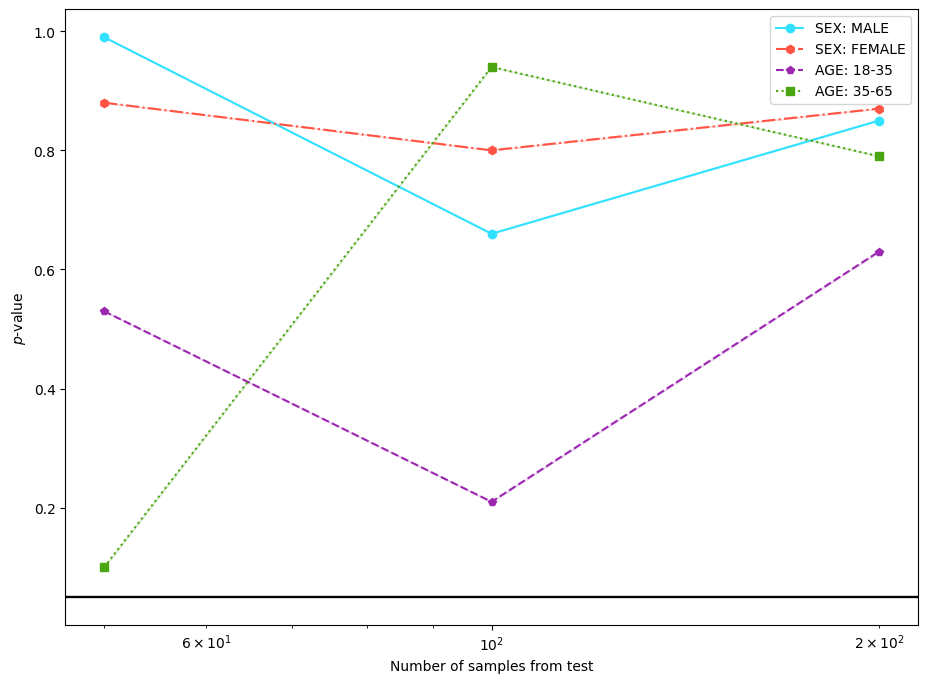

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.89 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.33 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.86 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.29 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.83 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.49 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.19 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.29 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.12 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.57 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.94 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.46 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.04 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.72 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.99 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.19 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.01 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.61 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.63 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.21 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.45 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.76 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.80 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.19 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.52 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.78 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.26 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.91 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.96 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.16 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.46 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.07 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.49 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.87 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.58 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.83 examples/s]

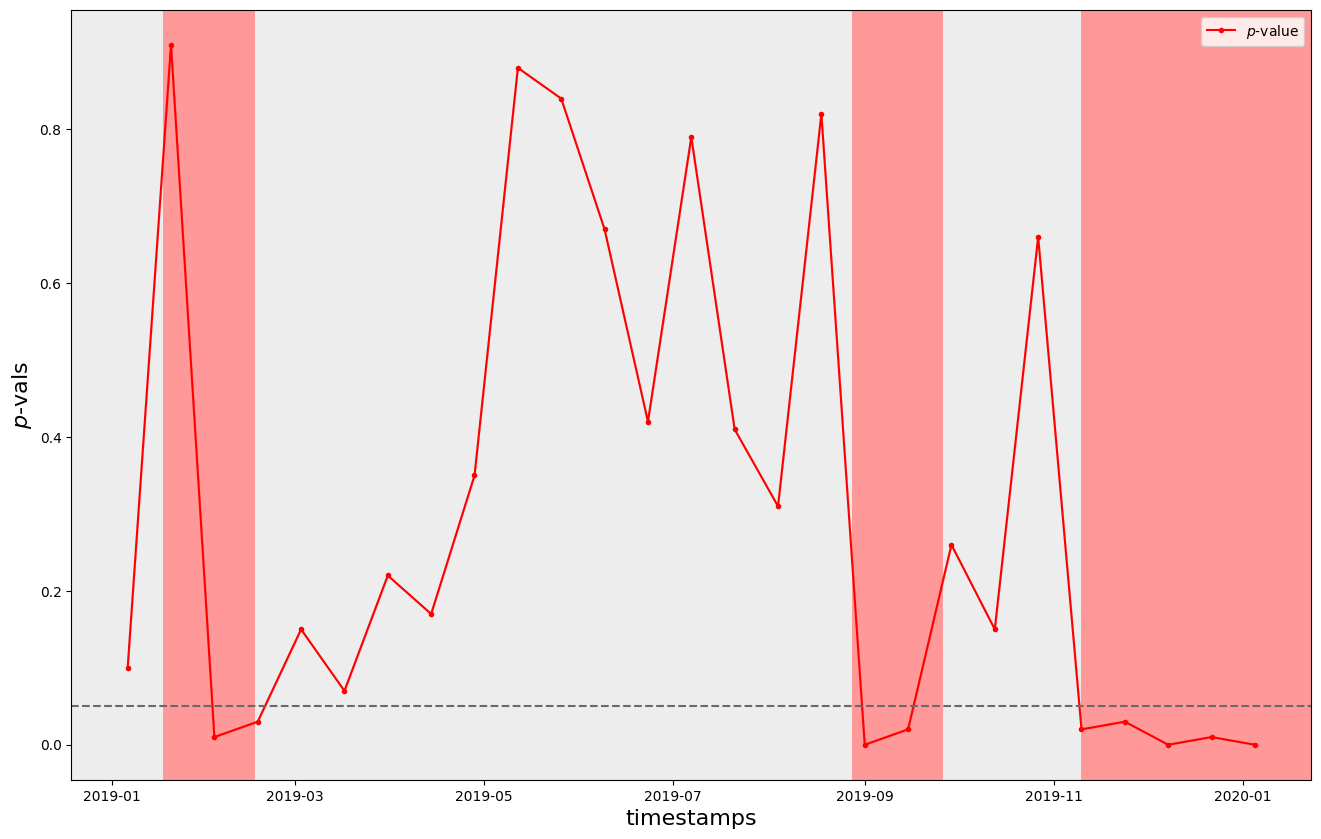

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)